[array([[1.00000000e-01, 6.23172906e+05],
       [2.00000000e-01, 5.57575758e+05],
       [3.00000000e-01, 4.91978610e+05],
       [4.00000000e-01, 4.26381462e+05],
       [5.00000000e-01, 3.60784314e+05],
       [6.00000000e-01, 2.95187166e+05],
       [7.00000000e-01, 2.29590018e+05],
       [8.00000000e-01, 1.63992870e+05]]), array([[1.00000000e-01, 6.55971480e+05],
       [2.00000000e-01, 5.90374332e+05],
       [3.00000000e-01, 5.24777184e+05],
       [4.00000000e-01, 4.59180036e+05],
       [5.00000000e-01, 3.93582888e+05],
       [6.00000000e-01, 3.27985740e+05],
       [7.00000000e-01, 2.62388592e+05],
       [8.00000000e-01, 1.96791444e+05]]), array([[1.00000000e-01, 6.88770053e+05],
       [2.00000000e-01, 6.23172906e+05],
       [3.00000000e-01, 5.57575758e+05],
       [4.00000000e-01, 4.91978610e+05],
       [5.00000000e-01, 4.26381462e+05],
       [6.00000000e-01, 3.60784314e+05],
       [7.00000000e-01, 2.95187166e+05],
       [8.00000000e-01, 2.29590018e+05]]), array([[1

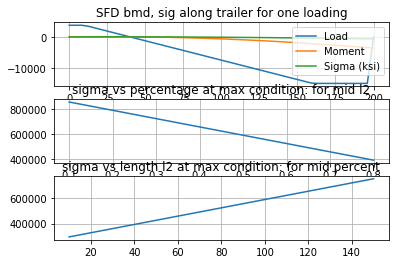

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 

# sigularities 

def sing(x,a,n): 

    ni = np.zeros(x.size) 

    for i in range(x.size): 

        if x[i] >=a and n>=0: 

            ni[i] = (x[i]-a)**n 

    return ni 

  

def lx(xi,a,b): 

    return (1-pc)*m*sing(xi,0,a)-m/l2*sing(xi,l3,b)+m/l2*sing(xi,l3+l2,b)+pc*m*sing(xi,l1,a) 

 

#constants 

l1 = 200 

m = 18400 

S = 5.61 

 

# predefined arrays 

xx = np.linspace(0,200) 

lii = np.linspace(10, 150, 15) 

pc2 = np.arange(0.1,0.9,0.1) 

o_m_l = [] 

max_loc = [] 

 

 

 

# loop through locations 

for ll in lii: 

    l2 = ll  # initialize constants for each 

    max_p = [] 

  

    for p in pc2: 

        pc = p 

        l3 = 200*pc-l2  # calculates resulting length 

  

        #singularity 

        load = lx(xx,0,1) 

        mom = lx(xx,1,2) 

  

        sig = mom/S  # stress 

        max_sig = np.max(np.abs(sig)) 

        max_p.append([pc, max_sig])  # max stress for this loading condition and this location 

  

    # tabulation of this location, and max of location 

    max_p = np.array(max_p) 

  

    m_n = np.argmax(max_p,0) 

    m_a = max_p[m_n[1],:] 

  

    # adding to list of all locs 

    max_loc.append(max_p) 

    o_m_l.append(m_a) 

  

# max of all 

o_m_l = np.array(o_m_l) 

m_aa = np.argmax(o_m_l,0) 

  

m_aaa = o_m_l[m_aa[1],:] 

  

print(max_loc) 

print(f'overall max at: {lii[m_aa[1]]}, {m_aaa[0]} = {m_aaa[1]}') 

 

 

 

# init plots 

fig, ax = plt.subplots(3,1) 

title = ['SFD bmd, sig along trailer for one loading', 'sigma vs percentage at max condition: for mid l2', 'sigma vs length l2 at max condition: for mid percent'] 

  

# stress for las condition for bmd... 

ax[0].plot(xx,load) 

ax[0].plot(xx,mom*1e-3) 

ax[0].plot(xx,sig*1e-3) 

  

ax[0].legend(['Load', 'Moment', 'Sigma (ksi)']) 

  

#for same loc 

ax[1].plot(pc2, max_loc[7][:,1]) 

  

# for same per 

ax[2].plot(lii,[i[5,1] for i in max_loc]) 

  

# for readbility 

for iii in range(3): 

    ax[iii].grid(True) 

    ax[iii].set_title(title[iii]) 